In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

## Load Data

In [2]:
# import concurrent.futures
# 
# def load_image_data(image_filename, path_images, path_masks, image_class_mapping):
#     # Load images and masks
#     image = cv2.imread(str(os.path.join(path_images, image_filename)))
#     mask = cv2.imread(str(os.path.join(path_masks, image_filename)))
#     
#     # Convert to RGB
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
#     
#     # Get image class if it exists
#     image_class_array = image_class_mapping[image_class_mapping['Image'] == image_filename]['Class'].values
#     image_class = image_class_array[0] if len(image_class_array) > 0 else None
#     
#     # Return a dictionary for each image to add to the final dataframe
#     return {
#         'image_number': os.path.splitext(image_filename)[0],
#         'image': image,
#         'mask': mask,
#         'class': image_class
#     }
# 
# def load_images_from_folder_parallel(folder, show_progress_every=100):
#     # Load the image_class_mapping.xlsx file
#     image_class_mapping = pd.read_excel(os.path.join(folder, 'image_class_mapping.xlsx'))
#     
#     # Set up paths
#     path_images = os.path.join(folder, 'Sliced_Images')
#     path_masks = os.path.join(folder, 'Sliced_Masks')
#     images_filenames = os.listdir(path_images)
#     
#     # Dictionary to hold image data
#     image_dict = {'image_number': [], 'image': [], 'mask': [], 'class': []}
#     
#     # Use ThreadPoolExecutor to parallelize the loading
#     with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
#         futures = [
#             executor.submit(load_image_data, image_filename, path_images, path_masks, image_class_mapping)
#             for image_filename in images_filenames
#         ]
#         
#         # Retrieve results as they complete
#         for i, future in enumerate(concurrent.futures.as_completed(futures)):
#             result = future.result()
#             image_dict['image_number'].append(result['image_number'])
#             image_dict['image'].append(result['image'])
#             image_dict['mask'].append(result['mask'])
#             image_dict['class'].append(result['class'])
#             
#             if show_progress_every and (i + 1) % show_progress_every == 0:
#                 print(f'Loaded {i + 1} images out of {len(images_filenames)}')
#     
#     # Convert the dictionary to a pandas dataframe with image_number as the index
#     return pd.DataFrame(image_dict).set_index('image_number')


In [3]:
#folder = 'data/Huron_data/'
#images_df = load_images_from_folder_parallel(folder, show_progress_every=1000)
#images_df

In [4]:
def get_images_df(folder):
    """
    Given the Huron_data folder path, return a dataframe with the path to the images and masks as well as the class of the image if it exists.
    The index of the dataframe is the image number.
    
    :param folder: path to the Huron_data folder
    :return: dataframe with the image paths and classes
    """
    # Load the image_class_mapping.xlsx file
    image_class_mapping = pd.read_excel(os.path.join(folder, 'image_class_mapping.xlsx'))
    
    # Set up paths
    path_images = os.path.join(folder, 'Sliced_Images')
    path_masks = os.path.join(folder, 'Sliced_Masks')
    images_filenames = os.listdir(path_images)
    
    # Dictionary to hold image data
    image_dict = {'image_number': [], 'image_path': [], 'mask_path': [], 'class': []}
    
    for image_filename in images_filenames:        
        # Get image class if it exists
        image_class_array = image_class_mapping[image_class_mapping['Image'] == image_filename]['Class'].values
        image_class = image_class_array[0] if len(image_class_array) > 0 else 'No class'
        
        # Add to the dictionary
        image_dict['image_number'].append(os.path.splitext(image_filename)[0])
        image_dict['image_path'].append(os.path.join(path_images, image_filename))
        image_dict['mask_path'].append(os.path.join(path_masks, image_filename))
        image_dict['class'].append(image_class)
    
    # Convert the dictionary to a pandas dataframe with image_number as the index
    return pd.DataFrame(image_dict).set_index('image_number')

In [5]:
folder = 'data/Huron_data/'
images_df = get_images_df(folder)
images_df

image_path  \
image_number                                           
0                data/Huron_data/Sliced_Images\0.png   
1                data/Huron_data/Sliced_Images\1.png   
10              data/Huron_data/Sliced_Images\10.png   
100            data/Huron_data/Sliced_Images\100.png   
1000          data/Huron_data/Sliced_Images\1000.png   
...                                              ...   
9995          data/Huron_data/Sliced_Images\9995.png   
9996          data/Huron_data/Sliced_Images\9996.png   
9997          data/Huron_data/Sliced_Images\9997.png   
9998          data/Huron_data/Sliced_Images\9998.png   
9999          data/Huron_data/Sliced_Images\9999.png   

                                          mask_path  \
image_number                                          
0                data/Huron_data/Sliced_Masks\0.png   
1                data/Huron_data/Sliced_Masks\1.png   
10              data/Huron_data/Sliced_Masks\10.png   
100            data/Huron_data/Sliced_Masks\100.png   
1000          data/Huron_data/Sliced_Masks\1000.png   
...                                             ...   
9995          data/Huron_data/Sliced_Masks\9995.png   
9996          data/Huron_data/Sliced_Masks\9996.png   
9997          data/Huron_data/Sliced_Masks\9997.png   
9998          data/Huron_data/Sliced_Masks\9998.png   
9999          data/Huron_data/Sliced_Masks\9999.png   

                                         class  
image_number                                    
0                      Preview Tiles_Ink Marks  
1                      Preview Tiles_Ink Marks  
10                     Preview Tiles_Ink Marks  
100           Preview Tiles_Large Solid Tissue  
1000          Preview Tiles_Large Solid Tissue  
...                                        ...  
9995                                  No class  
9996                                  No class  
9997                                  No class  
9998                                  No class  
9999                                  No class  

[17347 rows x 3 columns]

## Analyze distribution of classes

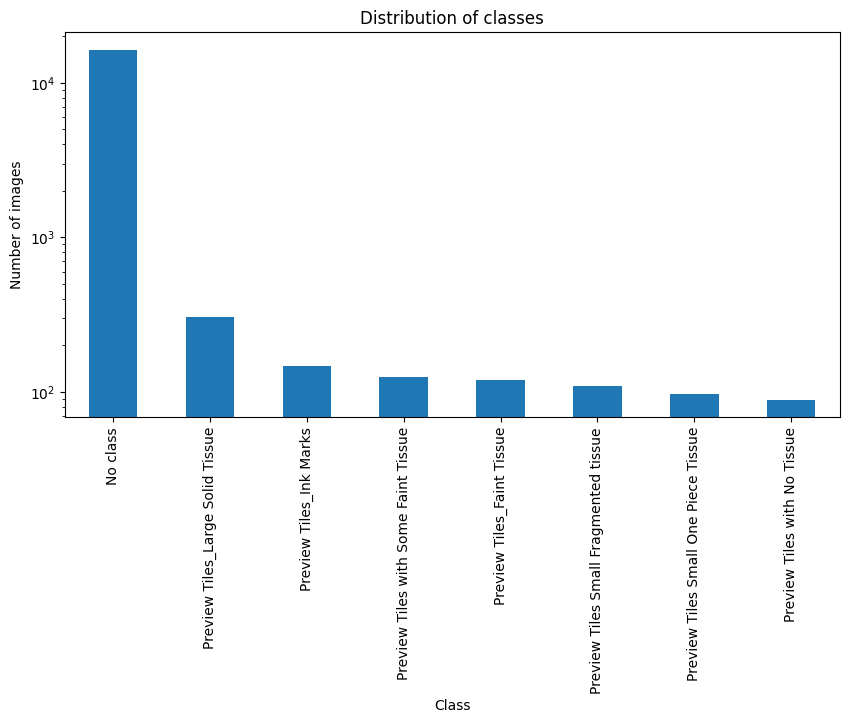

In [12]:
# Plot the distribution of classes
images_df['class'].sort_values().value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Distribution of classes')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

## Visualize

In [13]:
def plot_image(image_path):
    """
    Plot the image at the given path.
    
    :param image_path: path to the image
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.axis('off')

### Plot a few images at random

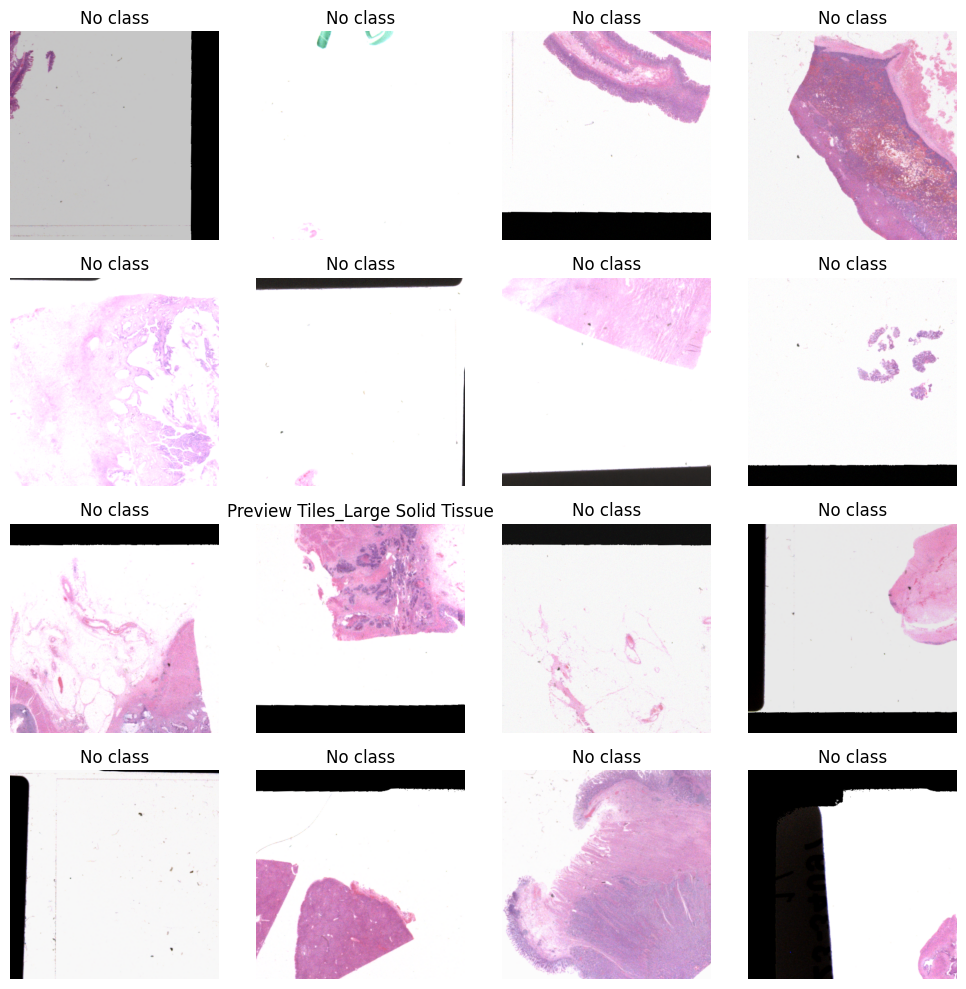

In [14]:
n = 16
random_images = images_df.sample(n)
plt.figure(figsize=(10, 10))
for i, (_, row) in enumerate(random_images.iterrows()):
    plt.subplot(4, 4, i + 1)
    plot_image(row['image_path'])
    plt.title(row['class'])

plt.tight_layout()
plt.show()

### Plot a few images of each class along with their masks

Preview Tiles_Ink Marks


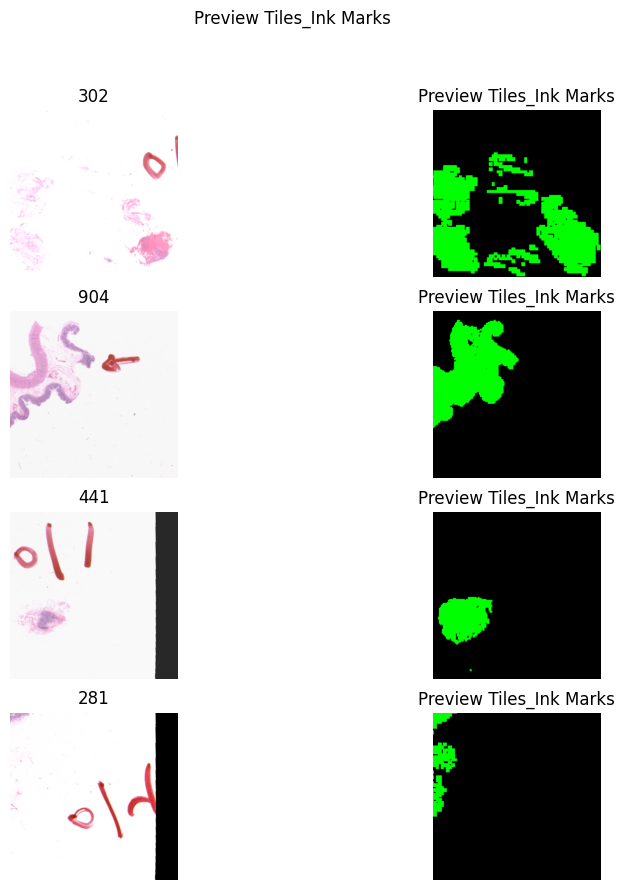

Preview Tiles_Large Solid Tissue


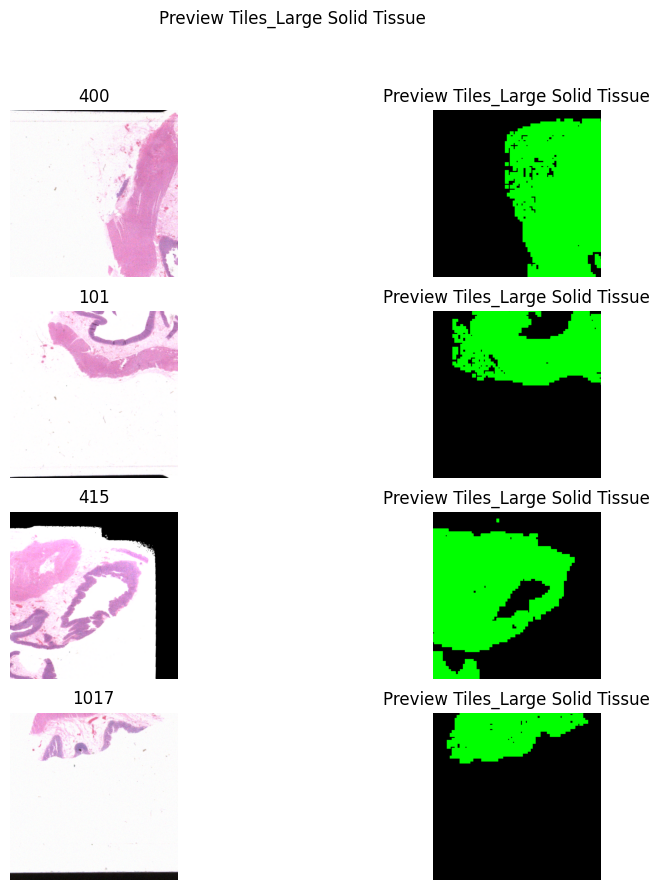

No class


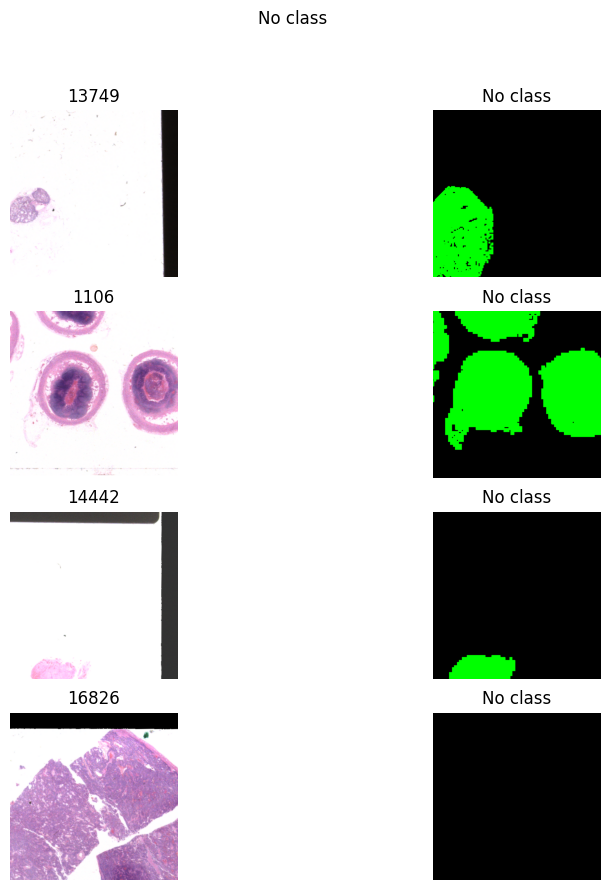

Preview Tiles Small One Piece Tissue


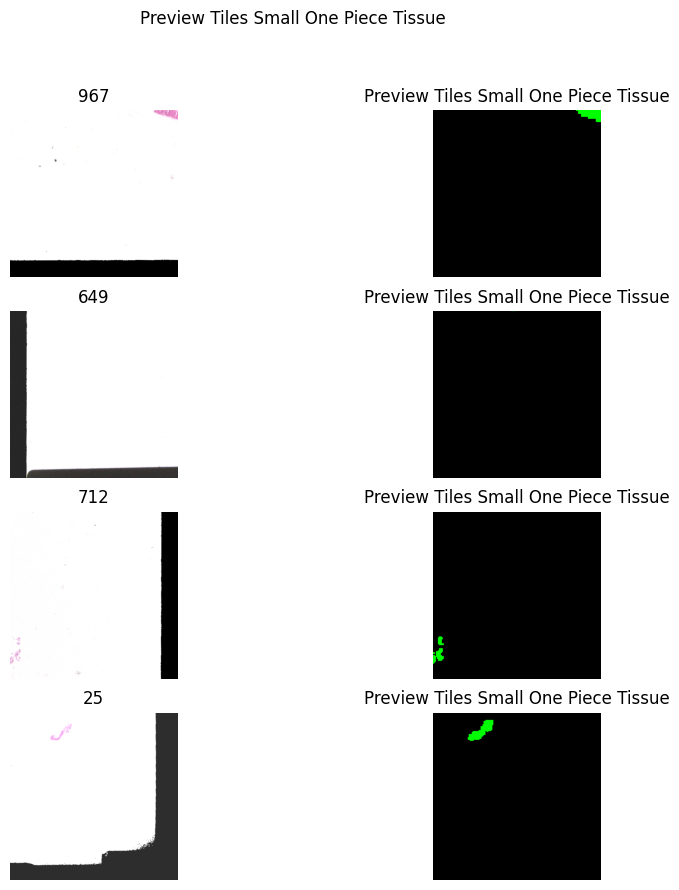

Preview Tiles with No Tissue


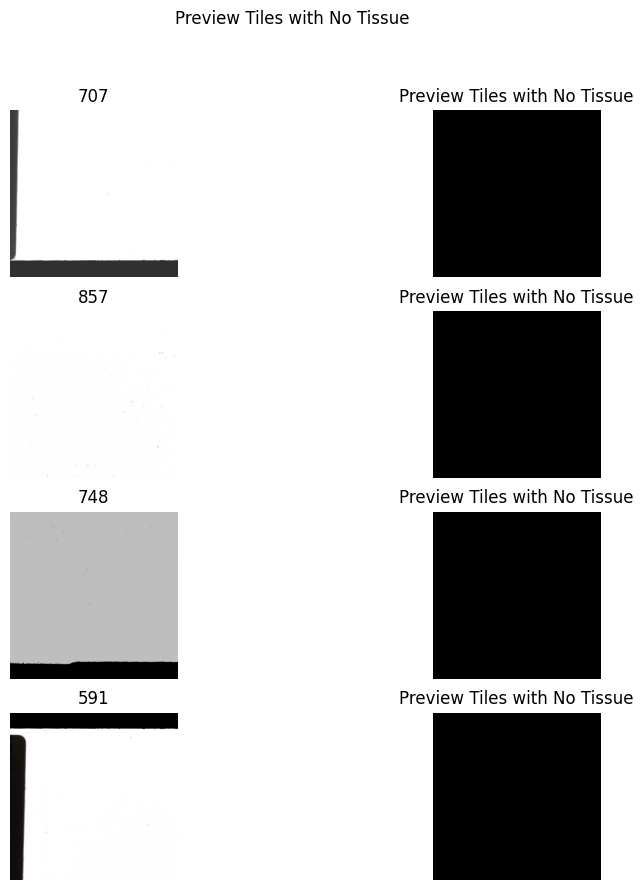

Preview Tiles_Faint Tissue


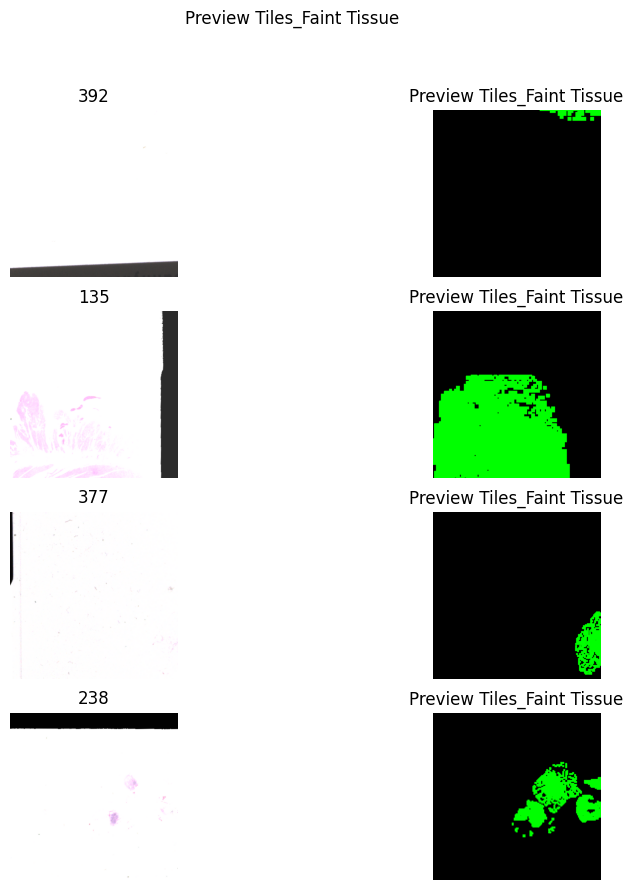

Preview Tiles with Some Faint Tissue


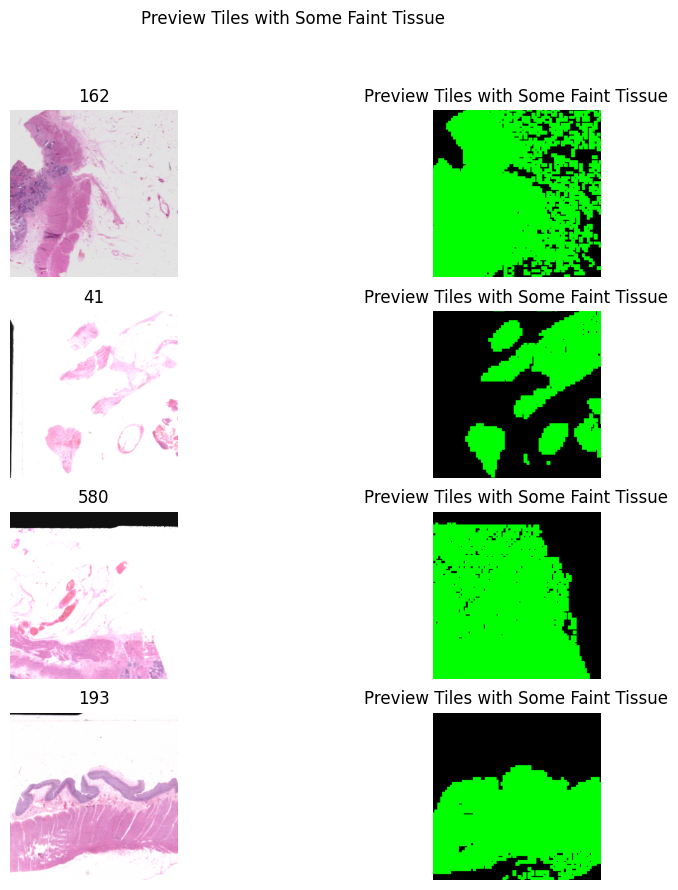

Preview Tiles Small Fragmented tissue


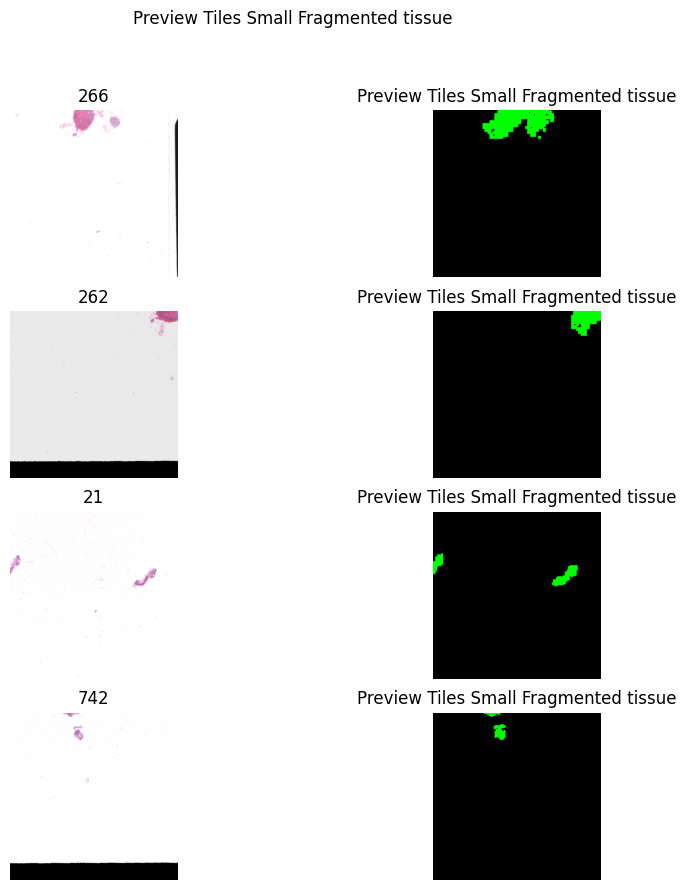

In [15]:
for class_name in images_df['class'].unique():
    plt.figure(figsize=(10, 10))
    class_images = images_df[images_df['class'] == class_name].sample(4)
    for i, (_, row) in enumerate(class_images.iterrows()):
        plt.subplot(4, 2, 2 * i + 1)
        plot_image(row['image_path'])
        plt.title(row.name)
        
        plt.subplot(4, 2, 2 * i + 2)
        plot_image(row['mask_path'])
        plt.title(row['class'])

    print(class_name)
    plt.suptitle(class_name)
    plt.show()

**Observations:**<br>
- It seems like the ground truth are not perfect. However, they are still somewhat good in general. I feel like the ground truth have a harder time with faint tissues.
- There are indeed a lot of images with pure black borders. We should find a way to remove these black borders in a consistent way.
- The ground truth masks seems to sometimes be labelled at a lower resolution than the images. For instance, some 1-2 pixel tissues in the images are covered by a larger chunk of pixels in the masks.
- The ink marks do not seem to be marked as tissues the majority of the time. However, they are still marked as tissues sometimes.

### More examples of the ink marks

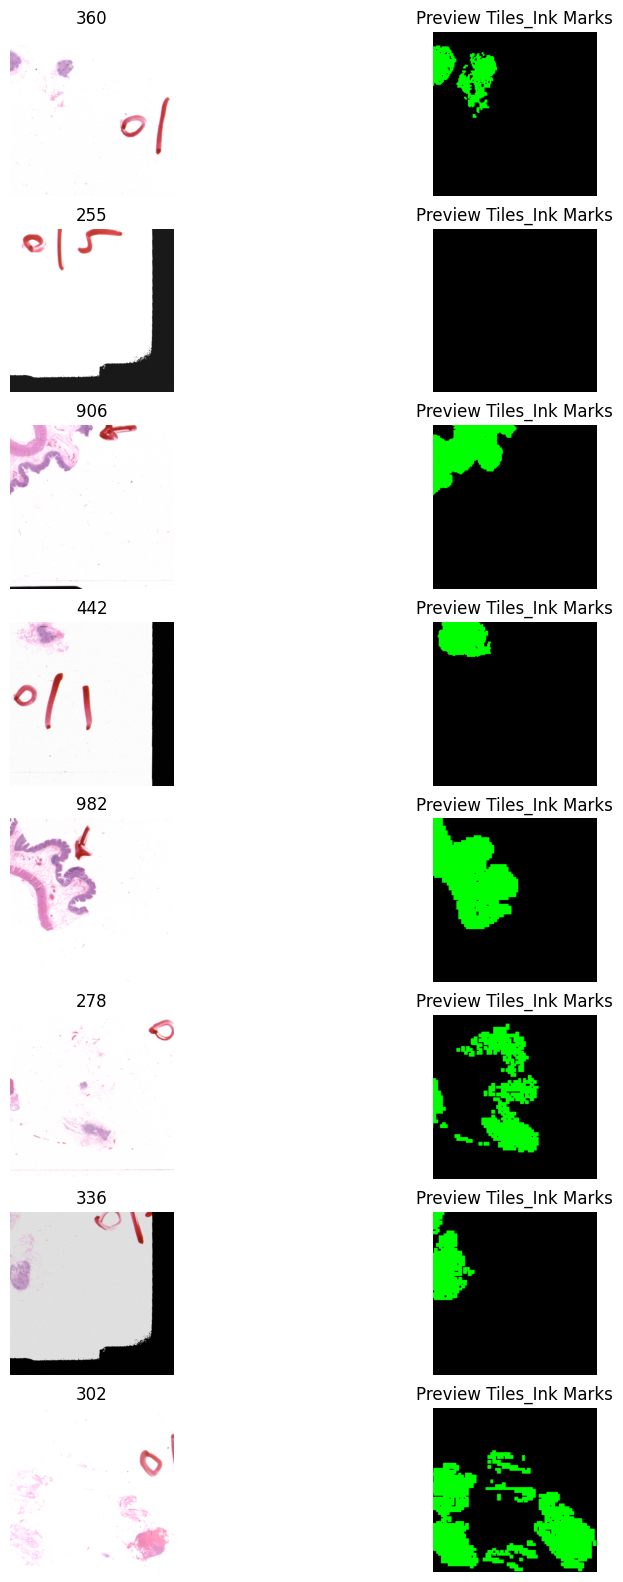

In [16]:
# Load the image with ink marks
images_ink_df = images_df[images_df['class'] == 'Preview Tiles_Ink Marks']
plt.figure(figsize=(10, 20))
for i, (_, row) in enumerate(images_ink_df.sample(8).iterrows()):
    plt.subplot(8, 2, 2 * i + 1)
    plot_image(row['image_path'])
    plt.title(row.name)
    
    plt.subplot(8, 2, 2 * i + 2)
    plot_image(row['mask_path'])
    plt.title(row['class'])

plt.show()

## Black Border Analysis

In [17]:
images_ids_with_black_borders = []

In [18]:
def has_black_borders(image_path, n=3, black_threshold=10):
    """
    If any of the borders has at least a width of n pixels that are close to black, return True.
    
    :param image_path: path to the image
    :param n: width of the border to check
    :return: True if the image has black borders, False otherwise
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Check top
    for i in range(n):
        if np.all(image[i] < black_threshold):
            return True
        
    # Check bottom
    for i in range(n):
        if np.all(image[-i] < black_threshold):
            return True
    
    # Check left
    for i in range(n):
        if np.all(image[:, i] < black_threshold):
            return True
        
    # Check right
    for i in range(n):
        if np.all(image[:, -i] < black_threshold):
            return True
    
    return False

In [19]:
sample_images = images_df.sample(1000)
flag_black_borders = sample_images['image_path'].apply(lambda path: has_black_borders(path))

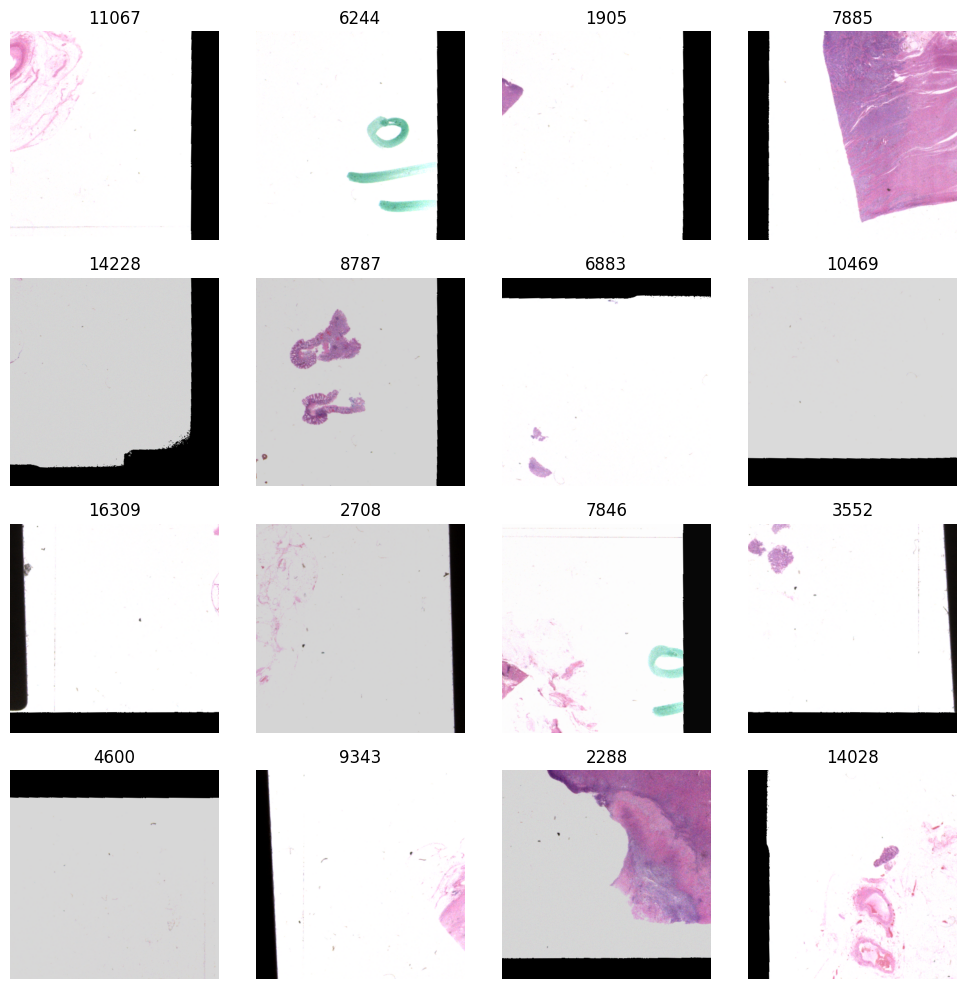

In [20]:
# Plot a few images with black borders
plt.figure(figsize=(10, 10))
for i, (image_id, row) in enumerate(sample_images[flag_black_borders].sample(16).iterrows()):
    plt.subplot(4, 4, i + 1)
    plot_image(row['image_path'])
    plt.title(image_id)

plt.tight_layout()
plt.show()

### Analysis of faint tissues and potential preprocessing

In [21]:
faint_tissues_images = images_df[images_df['class'] == 'Preview Tiles_Faint Tissue']

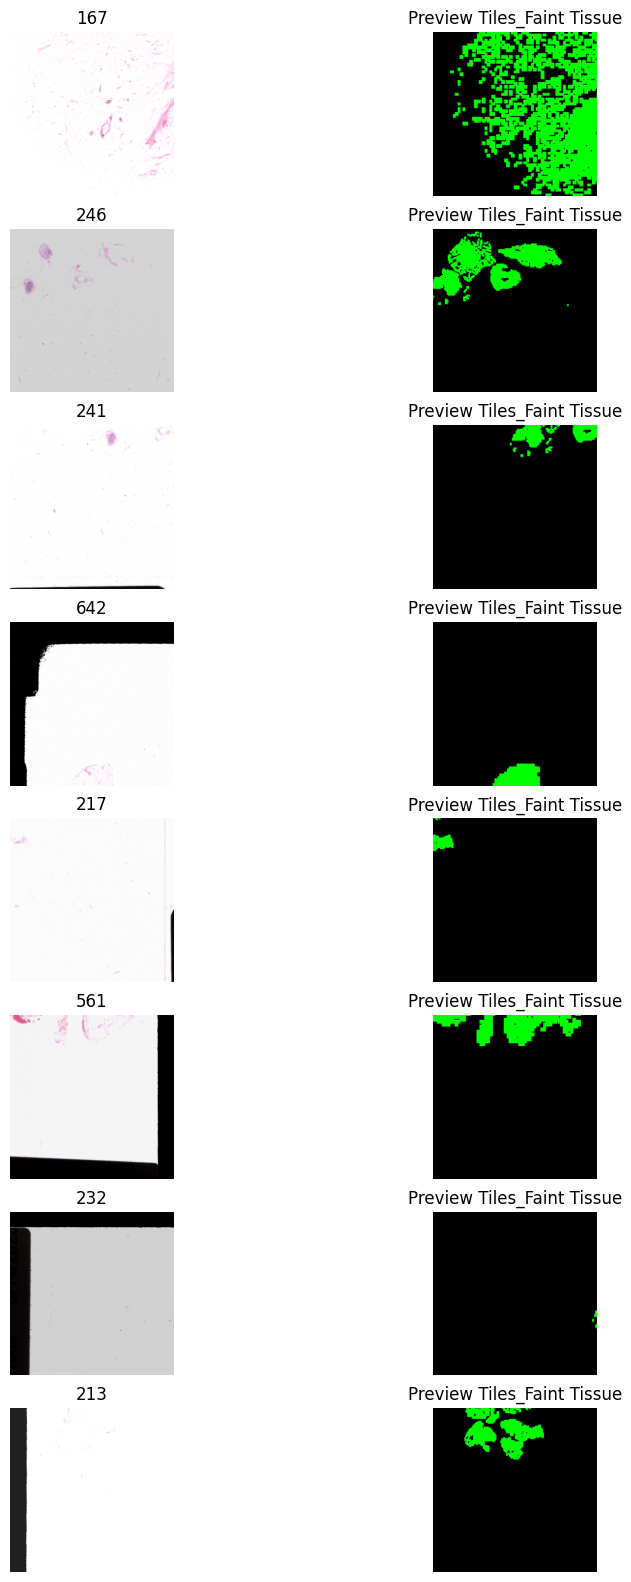

In [22]:
# Plot a few images with faint tissues along with their masks
plt.figure(figsize=(10, 20))
for i, (_, row) in enumerate(faint_tissues_images.sample(8).iterrows()):
    plt.subplot(8, 2, 2 * i + 1)
    plot_image(row['image_path'])
    plt.title(row.name)
    
    plt.subplot(8, 2, 2 * i + 2)
    plot_image(row['mask_path'])
    plt.title(row['class'])
    
plt.show()

### Analysis of potentially bad masks

In [43]:
def dice_score(gray_mask, gray_image):
    """
    Compute the DICE score between the gray mask and the gray image.
    
    :param gray_mask: ground truth gray scale mask
    :param gray_image: gray scale image
    :return: DICE score
    """
    mask_gt_0 = gray_mask > 0
    gray_image_gt_0 = gray_image > 0
    intersection = np.sum(mask_gt_0 & gray_image_gt_0)
    combined = np.sum(mask_gt_0) + np.sum(gray_image_gt_0)
    
    if combined == 0: # no tissue whatsoever
        return 1
    
    return 2 * intersection / (np.sum(mask_gt_0) + np.sum(gray_image_gt_0))

In [100]:
def get_dice_score(row):
    image = cv2.imread(row['image_path'])
    mask = cv2.imread(row['mask_path'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    
    # Make every pixel that is on the gray scale 255 and the rest 0
    # A pixel is on the gray scale is all of its RGB values are the same or almost the same (max difference of 10 [arbitrary])
    image = cv2.blur(image, (3, 3)) # blur so that mix of dark colors are set to black
    image_H, image_W, image_C = image.shape
    gray_image = (np.abs(image - image.mean(axis=2).reshape(image_H, image_W, 1).repeat(image_C, axis=2)) < 10).all(axis=2) * 255

    # invert the gray image so that the 255s are the tissues in both
    inverted_gray_image = 255 - gray_image
    return dice_score(gray_mask, inverted_gray_image)


In [101]:
sample_images = images_df.sample(500)
dice_scores = sample_images.apply(get_dice_score, axis=1)

<Axes: >

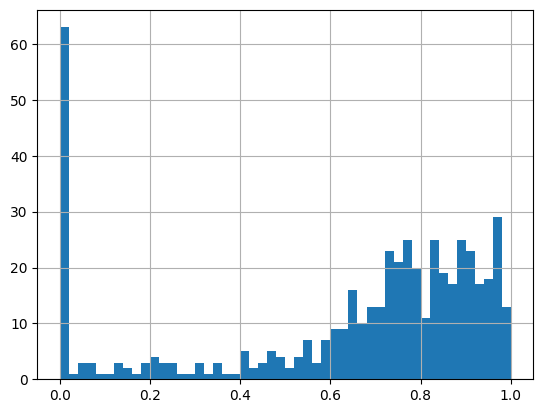

In [102]:
# Plot the distribution of DICE scores
dice_scores.hist(bins=50)

The very high frequency of 0 dice score is due to the fact that many images have no tissues at all. Therefore, the intersection is 0 and the DICE score is 0 even if the combined area is also extremely close to 0. Therefore, we shouldnt consider these images as bad masks.

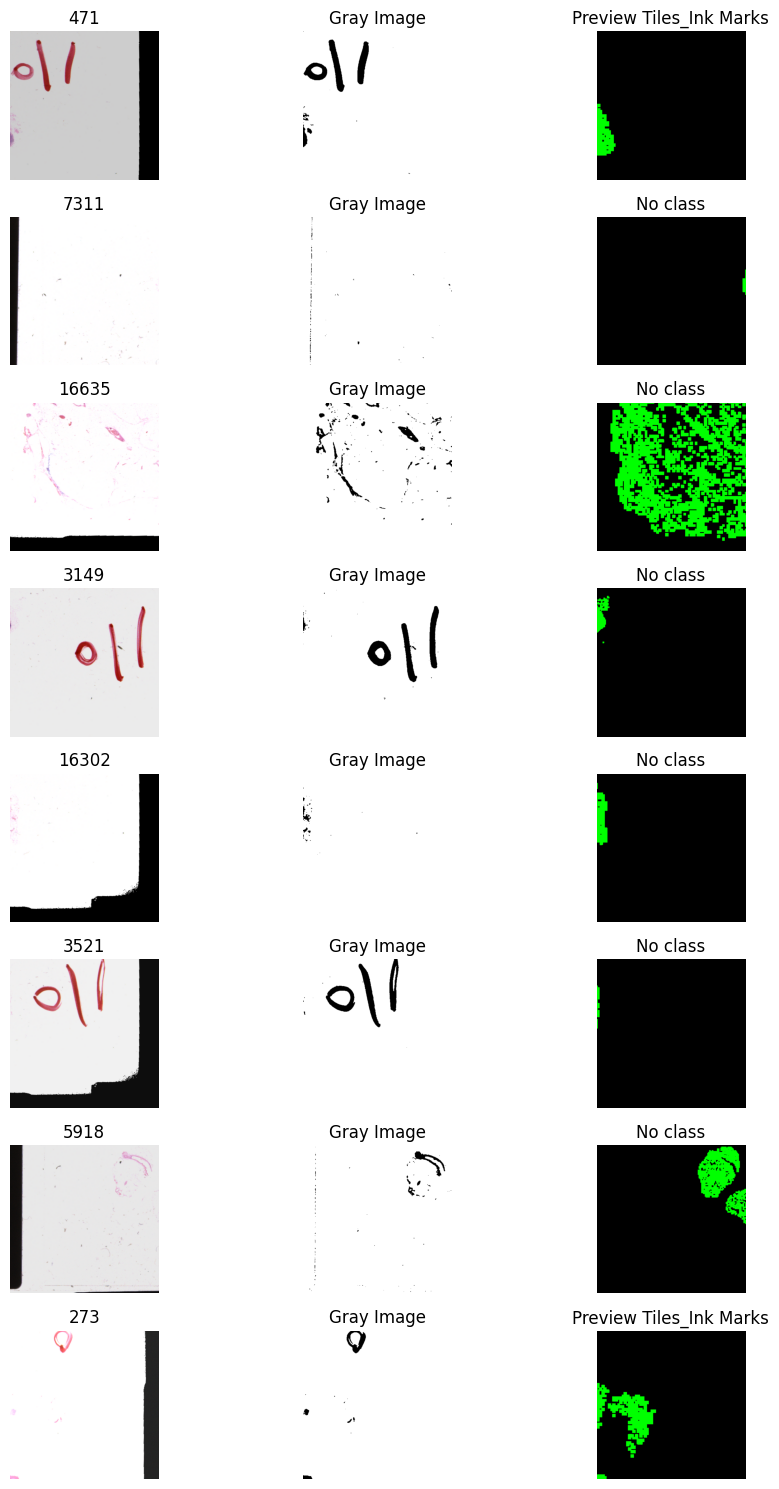

In [106]:
# Plot a few images with bad masks
plt.figure(figsize=(10, 15))
for i, (image_id, row) in enumerate(sample_images[(0 != dice_scores) & (dice_scores < 0.3)].sample(8).iterrows()):
    plt.subplot(8, 3, 3 * i + 1)
    plot_image(row['image_path'])
    plt.title(image_id)
    
    # modified
    plt.subplot(8, 3, 3 * i + 2)
    image = cv2.imread(row['image_path'])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.blur(image, (3, 3))
    image_H, image_W, image_C = image.shape
    gray_image = (np.abs(image - image.mean(axis=2).reshape(image_H, image_W, 1).repeat(image_C, axis=2)) < 10).all(axis=2) * 255
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    plt.title('Gray Image')
    
    plt.subplot(8, 3, 3 * i + 3)
    plot_image(row['mask_path'])
    plt.title(row['class'])

plt.tight_layout()
plt.show()

## Random Experimenting
This is just my experimenting randomly until i get an idea lol

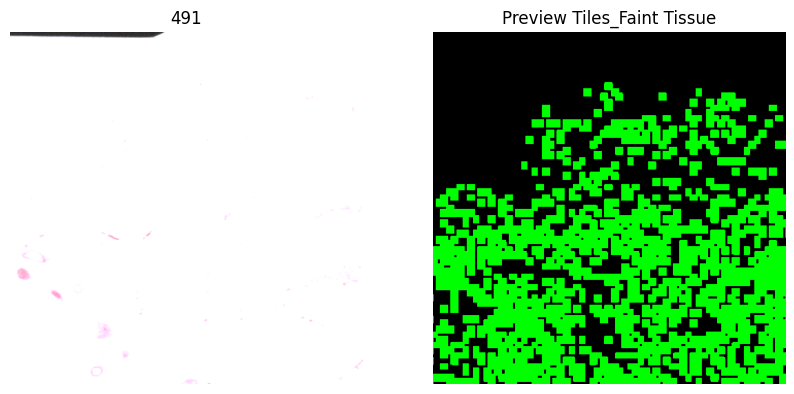

In [28]:
single_example = faint_tissues_images.sample(1).iloc[0]

# Plot the image and mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_image(single_example['image_path'])
plt.title(single_example.name)

plt.subplot(1, 2, 2)
plot_image(single_example['mask_path'])
plt.title(single_example['class'])

plt.show()

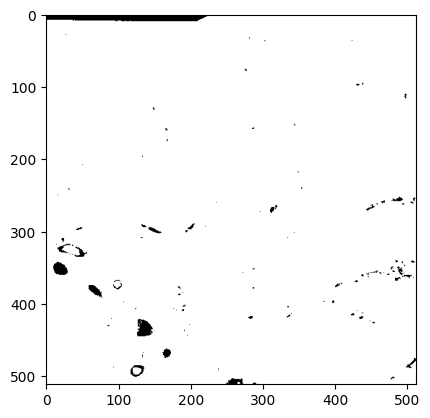

In [29]:
image = cv2.imread(single_example['image_path'])
mask = cv2.imread(single_example['mask_path'])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

# Using fixed threshold to separate the tissue from the background
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 253, 255, cv2.THRESH_BINARY)[1]

plt.imshow(thresh, cmap='gray')

In [30]:
# Function that takes in a gray scale image and sets the value of every pixel to 0 if there is more 0s than 255s in the nxn neighborhood
# It then repeats this process k times
def custom_blur(img, n=3, k=1):
    for _ in range(k):
        new_image = np.zeros_like(img)
        for i in range(n, img.shape[0] - n):
            for j in range(n, img.shape[1] - n):
                subset = img[i - n:i + n + 1, j - n:j + n + 1]
                if np.sum(subset == 0) + 2 > np.sum(subset == 255):
                    new_image[i, j] = 0
                else:
                    new_image[i, j] = img[i, j]
        img = new_image
    return img

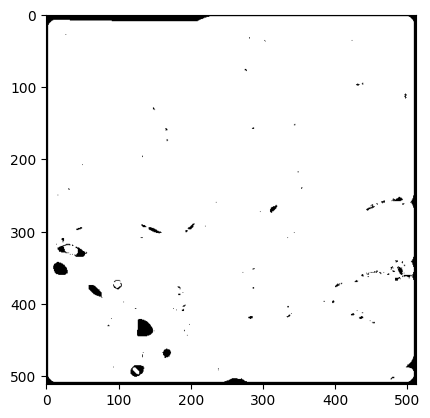

In [31]:
# Apply the custom blur function to the thresholded image 5 times
thresh_custom_blur = custom_blur(thresh, n=3, k=5)
plt.imshow(thresh_custom_blur, cmap='gray')

# Visualize preprocessed images
Using our custom preprocessing_utils.py file, we can visualize the images after preprocessing.
Many different preprocessing techniques were tested in this file and other files.
It is in this file that we compile the best preprocessing techniques to be used in the final training.

In [ ]:
from preprocessing_utils import preprocess_image